In [2]:
import pandas as pd

# Load both datasets
match_df = pd.read_csv("../data/raw/match_data.csv")
ball_df = pd.read_csv("../data/raw/ball_by_ball_data.csv")

# Preview structure
print("Match Columns:", match_df.columns.tolist())
print("Ball-by-ball Columns:", ball_df.columns.tolist())

match_df.head()


Match Columns: ['season', 'id', 'name', 'short_name', 'description', 'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score', '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom', 'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets', 'home_boundaries', 'away_overs', 'away_runs', 'away_wickets', 'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']
Ball-by-ball Columns: ['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty', 'dismissal_kind', 'player_dismissed', 'date']


,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,NaN,1370350,Chennai Super Kings v Gujarat Titans,CSK v GT,"Qualifier 1 (N), Indian Premier League at Chen...",CSK,GT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1370351,Lucknow Super Giants v Mumbai Indians,LSG v MI,"Eliminator (N), Indian Premier League at Chenn...",LSG,MI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1370352,TBC v TBC,TBC v TBC,"Qualifier 2 (N), Indian Premier League at Ahme...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1370353,TBC v TBC,TBC v TBC,"Final (N), Indian Premier League at Ahmedabad,...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre


In [3]:
# Null value count
match_df.isnull().sum()

season               5
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
toss_won             5
decision             5
1st_inning_score    13
2nd_inning_score    15
winner               1
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
home_captain         5
away_captain         5
pom                 17
points              65
super_over           5
home_overs          13
home_runs           13
home_wickets        13
home_boundaries     13
away_overs          15
away_runs           15
away_wickets        15
away_boundaries     15
highlights          27
home_key_batsman    13
home_key_bowler     26
home_playx1          5
away_playx1          5
away_key_batsman    15
away_key_bowler     24
match_days           5
umpire1              5
umpire2              5
tv_umpire            7
referee              5
reserve_umpire      31
dtype: int6

In [4]:
# Fill empty string for captains, POM, umpires
match_df.fillna({
    'home_captain': 'Unknown',
    'away_captain': 'Unknown',
    'pom': 'None',
    'umpire1': 'Unknown',
    'umpire2': 'Unknown'
}, inplace=True)

# If score values are missing, drop that match
match_df.dropna(subset=['home_runs', 'away_runs'], inplace=True)


In [5]:
# Basic info
ball_df.info()

# Sample rows
ball_df.head()

# Nulls
ball_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   over_ball         260920 non-null  float64
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batting_team      260920 non-null  object 
 6   bowling_team      260920 non-null  object 
 7   batsman           260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   bowler            260920 non-null  object 
 10  batsman_runs      260920 non-null  int64  
 11  extras            260920 non-null  int64  
 12  isWide            8381 non-null    float64
 13  isNoBall          1093 non-null    float64
 14  Byes              673 non-null     float64
 15  LegByes           4001 non-null    float64
 16  Penalty           2 

matchId                  0
inning                   0
over_ball                0
over                     0
ball                     0
batting_team             0
bowling_team             0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extras                   0
isWide              252539
isNoBall            259827
Byes                260247
LegByes             256919
Penalty             260918
dismissal_kind      247970
player_dismissed    247970
date                     0
dtype: int64

In [6]:
# Fill non-critical columns with 0
ball_df.fillna({
    'dismissal_kind': 'None',
    'player_dismissed': 'None',
    'isWide': 0,
    'isNoBall': 0,
    'Byes': 0,
    'LegByes': 0,
    'Penalty': 0
}, inplace=True)


<Axes: title={'center': 'Top 10 Run Scorers'}, xlabel='batsman'>

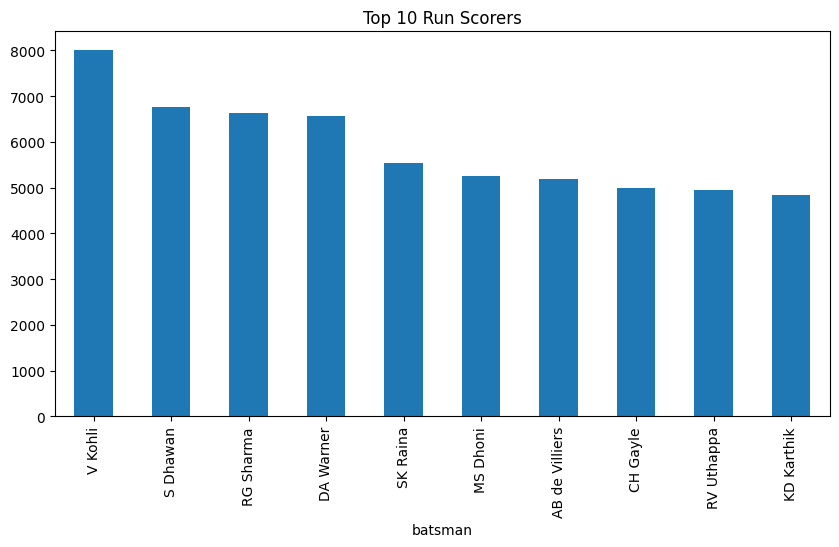

In [7]:
top_batsmen = ball_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batsmen.plot(kind='bar', title='Top 10 Run Scorers', figsize=(10, 5))


<Axes: title={'center': 'Top 10 Wicket Takers'}, xlabel='bowler'>

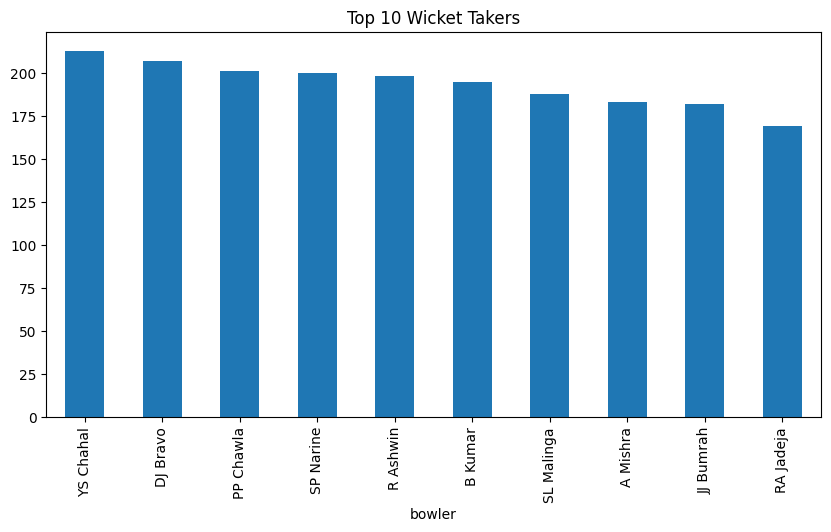

In [8]:
wickets_df = ball_df[ball_df['dismissal_kind'] != 'None']
top_bowlers = wickets_df.groupby('bowler').size().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='bar', title='Top 10 Wicket Takers', figsize=(10, 5))


<Axes: title={'center': 'Average Runs per Over'}, xlabel='over'>

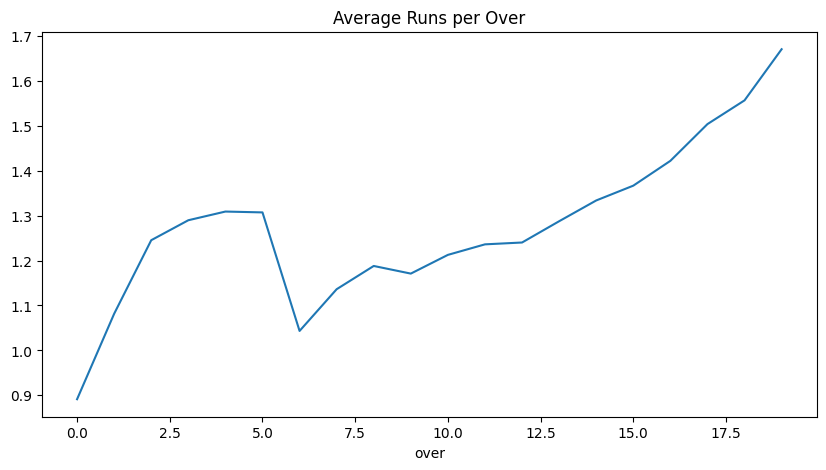

In [9]:
overwise = ball_df.groupby('over')['batsman_runs'].mean()
overwise.plot(title="Average Runs per Over", figsize=(10, 5))


In [10]:
match_df.to_csv("../data/processed/cleaned_match_data.csv", index=False)
ball_df.to_csv("../data/processed/cleaned_ball_data.csv", index=False)


In [11]:
match_df = pd.read_csv("../data/processed/cleaned_match_data.csv")


In [12]:
# Create summary dataframe
summary = match_df[['id', 'season', 'home_team', 'away_team',
                    'home_runs', 'away_runs', 'winner', 'venue_name']].copy()

summary.rename(columns={
    'id': 'match_id',
    'home_team': 'team1',
    'away_team': 'team2',
    'home_runs': 'team1_score',
    'away_runs': 'team2_score'
}, inplace=True)

# Assign winner as either team1 or team2 label
summary['winner_label'] = summary.apply(
    lambda row: 'team1' if row['winner'] == row['team1'] else (
        'team2' if row['winner'] == row['team2'] else 'draw/no result'
    ), axis=1
)

summary.head()


,match_id,season,team1,team2,team1_score,team2_score,winner,venue_name,winner_label
0,1359544,2023.0,RCB,GT,197.0,198.0,GT,"M.Chinnaswamy Stadium, Bengaluru",team2
1,1359543,2023.0,MI,SRH,201.0,200.0,MI,"Wankhede Stadium, Mumbai",team1
2,1359542,2023.0,KKR,LSG,175.0,176.0,LSG,"Eden Gardens, Kolkata",team2
3,1359541,2023.0,DC,CSK,146.0,223.0,CSK,"Arun Jaitley Stadium, Delhi",team2
4,1359540,2023.0,PBKS,RR,187.0,189.0,RR,"Himachal Pradesh Cricket Association Stadium, ...",team2


In [13]:
summary.to_csv("../data/processed/match_summary.csv", index=False)


In [14]:


df = pd.read_csv("../data/processed/match_summary.csv")
df.head()


,match_id,season,team1,team2,team1_score,team2_score,winner,venue_name,winner_label
0,1359544,2023.0,RCB,GT,197.0,198.0,GT,"M.Chinnaswamy Stadium, Bengaluru",team2
1,1359543,2023.0,MI,SRH,201.0,200.0,MI,"Wankhede Stadium, Mumbai",team1
2,1359542,2023.0,KKR,LSG,175.0,176.0,LSG,"Eden Gardens, Kolkata",team2
3,1359541,2023.0,DC,CSK,146.0,223.0,CSK,"Arun Jaitley Stadium, Delhi",team2
4,1359540,2023.0,PBKS,RR,187.0,189.0,RR,"Himachal Pradesh Cricket Association Stadium, ...",team2


In [15]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.preprocessing import LabelEncoder

le_team = LabelEncoder()
df['team1_encoded'] = le_team.fit_transform(df['team1'])
df['team2_encoded'] = le_team.transform(df['team2'])  # use same encoder
df['winner_encoded'] = df['winner_label'].apply(lambda x: 0 if x == 'team1' else (1 if x == 'team2' else -1))

# Filter out "draw/no result"
df = df[df['winner_encoded'] != -1]

df[['team1', 'team2', 'team1_encoded', 'team2_encoded', 'winner_encoded']].head()


,team1,team2,team1_encoded,team2_encoded,winner_encoded
0,RCB,GT,11,3,1
1,MI,SRH,8,14,0
2,KKR,LSG,4,7,1
3,DC,CSK,1,0,1
4,PBKS,RR,9,13,1


In [17]:
from sklearn.model_selection import train_test_split

features = df[['team1_encoded', 'team2_encoded', 'team1_score']]
labels = df['winner_encoded']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5490196078431373
Confusion Matrix:
 [[67 40]
 [52 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.63      0.59       107
           1       0.53      0.46      0.49        97

    accuracy                           0.55       204
   macro avg       0.55      0.55      0.54       204
weighted avg       0.55      0.55      0.55       204



In [20]:
import joblib

joblib.dump(clf, "../models/match_winner_rf_model.pkl")
joblib.dump(le_team, "../models/team_label_encoder.pkl")


['../models/team_label_encoder.pkl']

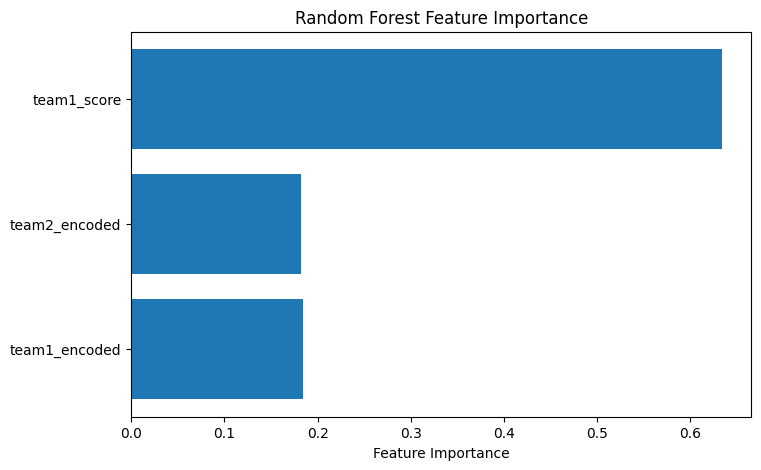

In [21]:
import matplotlib.pyplot as plt

# Plot feature importances
importances = clf.feature_importances_
feature_names = features.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.5817958179581796


In [23]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned Accuracy: 0.5686274509803921


In [24]:
!pip install xgboost



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from xgboost import XGBClassifier

# Instantiate and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)


c:\Users\priya\ipl-cricket-predictor\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.5441176470588235
Confusion Matrix:
 [[61 46]
 [47 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.57       107
           1       0.52      0.52      0.52        97

    accuracy                           0.54       204
   macro avg       0.54      0.54      0.54       204
weighted avg       0.54      0.54      0.54       204



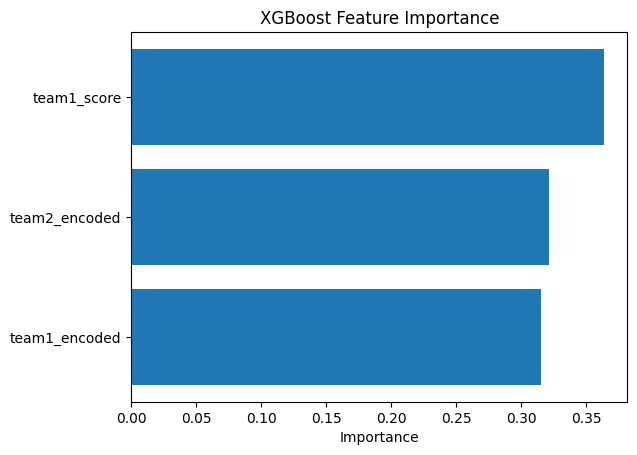

In [27]:
import matplotlib.pyplot as plt

xgb_importance = xgb_model.feature_importances_

plt.barh(features.columns, xgb_importance)
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()


In [28]:
import joblib

joblib.dump(xgb_model, "../models/match_winner_xgb_model.pkl")


['../models/match_winner_xgb_model.pkl']

In [29]:
df.head()

,match_id,season,team1,team2,team1_score,team2_score,winner,venue_name,winner_label,team1_encoded,team2_encoded,winner_encoded
0,1359544,2023.0,RCB,GT,197.0,198.0,GT,"M.Chinnaswamy Stadium, Bengaluru",team2,11,3,1
1,1359543,2023.0,MI,SRH,201.0,200.0,MI,"Wankhede Stadium, Mumbai",team1,8,14,0
2,1359542,2023.0,KKR,LSG,175.0,176.0,LSG,"Eden Gardens, Kolkata",team2,4,7,1
3,1359541,2023.0,DC,CSK,146.0,223.0,CSK,"Arun Jaitley Stadium, Delhi",team2,1,0,1
4,1359540,2023.0,PBKS,RR,187.0,189.0,RR,"Himachal Pradesh Cricket Association Stadium, ...",team2,9,13,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_id        1017 non-null   int64  
 1   season          1017 non-null   float64
 2   team1           1017 non-null   object 
 3   team2           1017 non-null   object 
 4   team1_score     1017 non-null   float64
 5   team2_score     1017 non-null   float64
 6   winner          1017 non-null   object 
 7   venue_name      1017 non-null   object 
 8   winner_label    1017 non-null   object 
 9   team1_encoded   1017 non-null   int64  
 10  team2_encoded   1017 non-null   int64  
 11  winner_encoded  1017 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 95.5+ KB


In [31]:
teams = pd.unique(df[['team1', 'team2', 'winner']].values.ravel())
print("Unique Teams:\n", teams)


Unique Teams:
 ['RCB' 'GT' 'MI' 'SRH' 'KKR' 'LSG' 'DC' 'CSK' 'PBKS' 'RR' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']
